In [5]:
import csv
import math
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import time

import pprint

In [5]:

f=open("trip_data_1.csv",'r')
r=csv.reader(f)
n=0
for row in r:
    print(row)
    print(type(row))
    n+=1
    if n>5:
        break


['medallion', 'hack_license', 'vendor_id', 'rate_code', 'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_time_in_secs', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
<class 'list'>
['89D227B655E5C82AECF13C3F540D4CF4', 'BA96DE419E711691B9445D6A6307C170', 'CMT', '1', 'N', '2013-01-01 15:11:48', '2013-01-01 15:18:10', '4', '382', '1.00', '-73.978165', '40.757977', '-73.989838', '40.751171']
<class 'list'>
['0BD7C8F5BA12B88E0B67BED28BEA73D8', '9FD8F69F0804BDB5549F40E9DA1BE472', 'CMT', '1', 'N', '2013-01-06 00:18:35', '2013-01-06 00:22:54', '1', '259', '1.50', '-74.006683', '40.731781', '-73.994499', '40.75066']
<class 'list'>
['0BD7C8F5BA12B88E0B67BED28BEA73D8', '9FD8F69F0804BDB5549F40E9DA1BE472', 'CMT', '1', 'N', '2013-01-05 18:49:41', '2013-01-05 18:54:23', '1', '282', '1.10', '-74.004707', '40.73777', '-74.009834', '40.726002']
<class 'list'>
['DFD2202EE08F7A8DC9A57B02ACB81FE2', '51EE87E3205C985EF843

In this project we will analyze a dataset which contains information about taxi rides in NYC.  The data set is quite large so getting a basic idea of what the data contains is important.  Each student should use one of the CSV files.  Answer the following questions:

- What datetime range does your data cover?  How many rows are there total?
- What are the field names?  Give descriptions for each field.
- Give some sample data for each field.
- What MySQL data types / len would you need to store each of the fields?
    int(xx), varchar(xx),date,datetime,bool, decimal(m,d)
- What is the geographic range of your data (min/max - X/Y)?
    Plot this (approximately on a map)
- What is the average computed trip distance? (You should use Haversine Distance)
- Draw a histogram of the trip distances binned anyway you see fit.
- What are the distinct values for each field? (If applicable)
- For other numeric types besides lat and lon, what are the min and max values?
- Create a chart which shows the average number of passengers each hour of the day. (X axis should have 24 hours)
- Create a new CSV file which has only one out of every thousand rows.
- Repeat step 9 with the reduced dataset and compare the two charts.



#### 1. What datetime range does your data cover? How many rows are there total?


In [19]:
start=time.time()
total_rows=0
d=[]
f=open("trip_data_1.csv",'r')
r=csv.reader(f)
total_rows=0
for row in r:
    if total_rows!=0:
        pickup_date=dt.datetime.strptime(row[5],"%Y-%m-%d %H:%M:%S")
        d.append(pickup_date)
    total_rows+=1
print("Total Rows: ",total_rows)
print("Datetime Range: from {a} to {b}".format(a=min(d),b=max(d)))
print("Time taken:",time.time()-start)

Total Rows:  14776616
Datetime Range: from 2013-01-01 00:00:00 to 2013-01-31 23:59:59
Time taken: 84.58772301673889


#### 2. What are the field names? Give descriptions for each field.

In [7]:
f=open("trip_data_1.csv",'r')
r=csv.reader(f)
for row in r:
    print("Field Names:",*row,sep='\n-')
    break

Field Names:
-medallion
-hack_license
-vendor_id
-rate_code
-store_and_fwd_flag
-pickup_datetime
-dropoff_datetime
-passenger_count
-trip_time_in_secs
-trip_distance
-pickup_longitude
-pickup_latitude
-dropoff_longitude
-dropoff_latitude


*Field Names and their description:*
- **medallion**          : permits allowing an individual or company to operate a taxicab
- **hack_license**      : driver's license
- **vendor_id**     : company id which opereates the Taxi
- **rate_code**        : type of fare that is applied for that ride
- **store_and_fwd_flag** : 
- **pickup_datetime**   : datetime when the passenger was picked up
- **dropoff_datetime**   : datetime when the passenger was dropped off
- **passenger_count**    : count of passengers in each ride
- **trip_time_in_secs**  : dropoff_datetime - pickup_datetime (total time in seconds to drop the passsenger to destination)
- **trip_distance**      : distance of the trip
- **pickup_longitude**   : longitude coordinate of the pickup location.
- **pickup_latitude**    : latitude coordinate of the pickup location.
- **dropoff_longitude**  : longitude coordinate of the dropoff location.
- **dropoff_latitude**   : latitude coordinate of the dropoff location.

#### 3. Give some sample data for each field.

In [8]:
f=open("trip_data_1.csv",'r')
r=csv.reader(f)
n=0

for row in r:
    print(*row,sep=" | ")
    n+=1
    if n>5:
        break

medallion | hack_license | vendor_id | rate_code | store_and_fwd_flag | pickup_datetime | dropoff_datetime | passenger_count | trip_time_in_secs | trip_distance | pickup_longitude | pickup_latitude | dropoff_longitude | dropoff_latitude
89D227B655E5C82AECF13C3F540D4CF4 | BA96DE419E711691B9445D6A6307C170 | CMT | 1 | N | 2013-01-01 15:11:48 | 2013-01-01 15:18:10 | 4 | 382 | 1.00 | -73.978165 | 40.757977 | -73.989838 | 40.751171
0BD7C8F5BA12B88E0B67BED28BEA73D8 | 9FD8F69F0804BDB5549F40E9DA1BE472 | CMT | 1 | N | 2013-01-06 00:18:35 | 2013-01-06 00:22:54 | 1 | 259 | 1.50 | -74.006683 | 40.731781 | -73.994499 | 40.75066
0BD7C8F5BA12B88E0B67BED28BEA73D8 | 9FD8F69F0804BDB5549F40E9DA1BE472 | CMT | 1 | N | 2013-01-05 18:49:41 | 2013-01-05 18:54:23 | 1 | 282 | 1.10 | -74.004707 | 40.73777 | -74.009834 | 40.726002
DFD2202EE08F7A8DC9A57B02ACB81FE2 | 51EE87E3205C985EF8431D850C786310 | CMT | 1 | N | 2013-01-07 23:54:15 | 2013-01-07 23:58:20 | 2 | 244 | .70 | -73.974602 | 40.759945 | -73.984734 | 40.7

In [9]:
import pprint
f=open("trip_data_1.csv",'r')
r=csv.reader(f)

keys=next(r)
values=[]
n=0
for row in r:
    if n>0:
        values.append(row)
    n+=1
    if n>5:
        break
values
my_dict = {key: value for key, *value in zip(keys, *values)}
pprint.pp(my_dict)

{'medallion': ['0BD7C8F5BA12B88E0B67BED28BEA73D8',
               '0BD7C8F5BA12B88E0B67BED28BEA73D8',
               'DFD2202EE08F7A8DC9A57B02ACB81FE2',
               'DFD2202EE08F7A8DC9A57B02ACB81FE2',
               '20D9ECB2CA0767CF7A01564DF2844A3E'],
 'hack_license': ['9FD8F69F0804BDB5549F40E9DA1BE472',
                  '9FD8F69F0804BDB5549F40E9DA1BE472',
                  '51EE87E3205C985EF8431D850C786310',
                  '51EE87E3205C985EF8431D850C786310',
                  '598CCE5B9C1918568DEE71F43CF26CD2'],
 'vendor_id': ['CMT', 'CMT', 'CMT', 'CMT', 'CMT'],
 'rate_code': ['1', '1', '1', '1', '1'],
 'store_and_fwd_flag': ['N', 'N', 'N', 'N', 'N'],
 'pickup_datetime': ['2013-01-06 00:18:35',
                     '2013-01-05 18:49:41',
                     '2013-01-07 23:54:15',
                     '2013-01-07 23:25:03',
                     '2013-01-07 15:27:48'],
 'dropoff_datetime': ['2013-01-06 00:22:54',
                      '2013-01-05 18:54:23',
                    

#### 4. What MySQL data types / len would you need to store each of the fields? int(xx),      --varchar(xx),date,datetime,bool, decimal(m,d)

*Field Names and their datatypes:*
- **medallion**          : VARCHAR(500)
- **hack_license**      : VARCHAR(500)
- **vendor_id**     : VARCHAR(500)
- **rate_code**        : INT
- **store_and_fwd_flag** : VARCHAR(10)
- **pickup_datetime**   : DATETIME
- **dropoff_datetime**   : DATETIME
- **passenger_count**    : INT
- **trip_time_in_secs**  : INT
- **trip_distance**      : decimal(6,2)
- **pickup_longitude**   : decimal(10,6)
- **pickup_latitude**    : decimal(10,6)
- **dropoff_longitude**  : decimal(10,6)
- **dropoff_latitude**   : decimal(10,6)

#### 5. What is the geographic range of your data (min/max - X/Y)? Plot this (approximately on a map)

In [10]:
# lets have the rows with correct lats and longs in a variable
f=open("trip_data_1.csv",'r')
r=csv.reader(f)
n=0


max_pickup_lat_value = float('-inf')
max_dropoff_lat_value = float('-inf')

max_pickup_long_value = float('-inf')
max_dropoff_long_value = float('-inf')

min_pickup_long_value = float('inf')
min_dropoff_long_value = float('inf')

min_pickup_lat_value = float('inf')
min_dropoff_lat_value = float('inf')

incorrect_values=0
blank=0

from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radius of Earth in kilometers (you can use 6371.0 km for distance in km)
    radius = 3958.8

    # Calculate the distance
    distance = radius * c

    return distance

for row in r:
    if n!=0:
        try:
            long1=float(row[10])# pickup_longitude
            lat1=float(row[11])# pickup_latitude
            long2=float(row[12])# dropoff_longitude
            lat2=float(row[13])# dropoff_latitude
            
            h_distance=math.floor(haversine_distance(lat1,long1,lat2,long2))
            act_distance=math.floor(float(row[9]))
            
            
            if ((round(abs(long1)) not in range(1,180)) or (round(abs(long2)) not in range(1,180)) or 
                (round(abs(lat1)) not in range(1,90)) or (round(abs(lat2)) not in range(1,90))):
                incorrect_values+=1
            
            else:
                
                if (((act_distance>0) and (abs(h_distance-act_distance) <2)) and 
                    ((int(lat1) in range(24,47)) and (int(lat2) in range(24,47)) and 
                    (int(long1) in range(-121,-69)) and (int(long2) in range(-121,-69)))):
                                
                    pickup_long_values=long1
                    pickup_lat_values=lat1
                    dropoff_long_values=long2
                    dropoff_lat_values=lat2

                    max_pickup_lat_value=max(pickup_lat_values,max_pickup_lat_value)
                    max_dropoff_lat_value=max(dropoff_lat_values,max_dropoff_lat_value)

                    min_pickup_lat_value=min(pickup_lat_values,min_pickup_lat_value)
                    min_dropoff_lat_value=min(dropoff_lat_values,min_dropoff_lat_value)


                    max_pickup_long_value=max(pickup_long_values,max_pickup_long_value)
                    max_dropoff_long_value=max(dropoff_long_values,max_dropoff_long_value)

                    min_pickup_long_value=min(pickup_long_values,min_pickup_long_value)
                    min_dropoff_long_value=min(dropoff_long_values,min_dropoff_long_value)
                  
        except Exception as e:
            blank+=1
            
    n+=1

print("Latitude Range: {} to {}".format(min(min_pickup_lat_value, min_dropoff_lat_value), max(max_pickup_lat_value, max_dropoff_lat_value)))
print("Longitude Range: {} to {}".format(min(min_pickup_long_value, min_dropoff_long_value), max(max_pickup_long_value, max_dropoff_long_value)))
    



Latitude Range: 26.262438 to 43.409451
Longitude Range: -80.259972 to -71.300003


#### 6. What is the average computed trip distance? (You should use Haversine Distance)

In [11]:
f=open("trip_data_1.csv",'r')
r=csv.reader(f)
h_distance=[]
actual_distance=[]
n=0
for row in r:
    if (n!=0) and (row[10]!='') and (row[11]!='') and (row[12]!='') and (row[13]!=''):
        # to exclude headers and skip blanks for lat and lon values 
        h_distance.append(haversine_distance(float(row[11]),float(row[10]),float(row[13]),float(row[12])))
        actual_distance.append(float(row[9]))
    n+=1

print("Average computed trip distance using haversine_distance: {} miles".format(round(sum(h_distance)/len(h_distance),0)))
print("Average computed trip distance using trip_distance column: {} miles".format(round(sum(actual_distance)/len(actual_distance),0)))

Average computed trip distance using haversine_distance: 12.0 miles
Average computed trip distance using trip_distance column: 3.0 miles


In [12]:
f=open("trip_data_1.csv",'r')
r=csv.reader(f)

n=0

incorrect_values=0
correct_values=0
blanks=0

for row in r:
    if n!=0:
        try:
            long1=float(row[10])# pickup_longitude
            lat1=float(row[11])# pickup_latitude
            long2=float(row[12])# dropoff_longitude
            lat2=float(row[13])# dropoff_latitude
            
            if ((round(abs(long1)) not in range(1,180)) or (round(abs(long2)) not in range(1,180)) or 
                (round(abs(lat1)) not in range(1,90)) or (round(abs(lat2)) not in range(1,90))):
                incorrect_values+=1
        
            else:
                correct_values+=1
                
        except Exception as e:
            blanks+=1
            
    n+=1

print("Total rows : {}".format(total_rows))
print("Rows with incorrect_values:",incorrect_values)
print("Rows with blanks:",blanks)
print("Total rows with incorrect coordinates : {} ".format(incorrect_values+blanks))
print("Percentage of incorrect values : ",round(((incorrect_values+blanks)/total_rows)*100,0),"%")

Total rows : 14776616
Rows with incorrect_values: 286678
Rows with blanks: 86
Total rows with incorrect coordinates : 286764 
Percentage of incorrect values :  2.0 %


In [13]:

f=open("trip_data_1.csv",'r')
r=csv.reader(f)
n=0

incorrect_values=0
correct_values=0
blank=0

h_distance=[]
actual_distance=[]


for row in r:
    if n!=0:
        try:
            long1=float(row[10])# pickup_longitude
            lat1=float(row[11])# pickup_latitude
            long2=float(row[12])# dropoff_longitude
            lat2=float(row[13])# dropoff_latitude
            
            if ((round(abs(long1)) not in range(1,180)) or (round(abs(long2)) not in range(1,180)) or 
                (round(abs(lat1)) not in range(1,90)) or (round(abs(lat2)) not in range(1,90))):
                incorrect_values+=1
        
            else:
                correct_values+=1
                h_distance.append(haversine_distance(float(row[11]),float(row[10]),float(row[13]),float(row[12])))
                actual_distance.append(float(row[9]))
                
        except Exception as e:
            blank+=1
            
    n+=1
print("Total_rows : {}".format(total_rows))
print("Rows with incorrect coordinates : {} ".format(incorrect_values+blank))
print("Percentage of incorrect values : ",round(((incorrect_values+blank)/total_rows)*100,0),"%")
print("Average computed trip distance using haversine_distance: {} miles".format(round(sum(h_distance)/len(h_distance),2)))
print("Average computed trip distance using trip_distance column: {} miles".format(round(sum(actual_distance)/len(actual_distance),2)))


Total_rows : 14776616
Rows with incorrect coordinates : 286764 
Percentage of incorrect values :  2.0 %
Average computed trip distance using haversine_distance: 2.12 miles
Average computed trip distance using trip_distance column: 2.78 miles


#### 7. Draw a histogram of the trip distances binned anyway you see fit.


In [27]:
import plotly.express as px

f=open("trip_data_1.csv",'r')
r=csv.reader(f)
td=[]
n=0
for row in r:
    if n!=0:
        td.append(float(row[9]))
    n+=1

In [37]:
px.histogram(td,
                   nbins=100, 
                   title="Trip Distance", 
                   labels={'value': 'Distance (miles)', 'count': 'Frequency'}).show()



<Axes: ylabel='Count'>

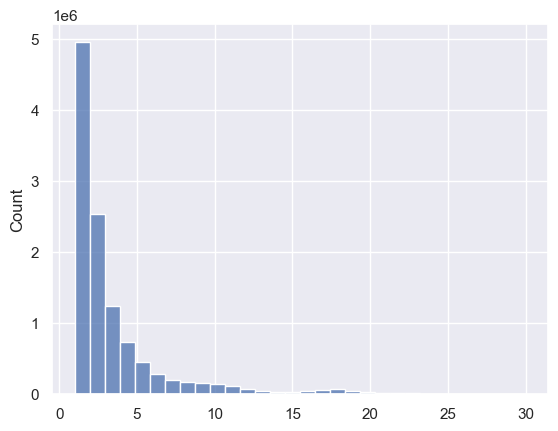

In [24]:
sns.histplot(td,kde=False,bins=30,binrange=(1,30))

#### 8. What are the distinct values for each field? (If applicable)

In [9]:

f=open("trip_data_1.csv",'r')
r=csv.reader(f)
n=0
medallion=[]
hack_license=[]
vendors=[]
rate_code=[]
store_and_fwd_flag=[]
passenger_count=[]

for row in r:
    if n!=0:
        medallion.append(row[0])   
        hack_license.append(row[1])
        vendors.append(row[2])
        rate_code.append(row[3])
        store_and_fwd_flag.append(row[4])
        passenger_count.append(row[7])
    n+=1


        



In [10]:
print("Unique Vendors:",set(vendors))
print("Unique rate_code:",set(rate_code))
print("Unique store_and_fwd_flag:",set(store_and_fwd_flag))
print("Unique passenger_count:",set(passenger_count))

Unique Vendors: {'CMT', 'VTS'}
Unique rate_code: {'1', '210', '4', '6', '0', '9', '3', '5', '2', '28', '128', '65', '8', '7'}
Unique store_and_fwd_flag: {'', 'Y', 'N'}
Unique passenger_count: {'1', '4', '6', '0', '3', '5', '2', '208', '255', '9'}


#### 9. For other numeric types besides lat and lon, what are the min and max values?

In [11]:
import csv
f=open("trip_data_1.csv",'r')
r=csv.reader(f)

n=0

pc_max=float('-inf')
pc_min=float('inf')

tt_max=float('-inf')
tt_min=float('inf')

td_max=float('-inf')
td_min=float('inf')

n=0
for row in r:
    
    if n!=0:
        if (float(row[7]) in range(1,20)) and (float(row[8])>0) and (float(row[9])>0):
            pc=float(row[7])
            pc_max=max(pc_max,pc)
            pc_min=min(pc_min,pc)

            tt=float(row[8])
            tt_max=max(tt_max,tt)
            tt_min=min(tt_min,tt)

            td=float(row[9])
            td_max=max(td_max,td)
            td_min=min(td_min,td)
    
    n+=1


In [12]:
print("passenger_count_max | passenger_count_min | triptime_mx | triptime_min | tripdistance_mx | tripdistance_min")
print(pc_max,"                |",pc_min,"                |",tt_max,"    |",tt_min,"         |",td_max,"          |",td_min)

passenger_count_max | passenger_count_min | triptime_mx | triptime_min | tripdistance_mx | tripdistance_min
9.0                 | 1.0                 | 10800.0     | 1.0          | 100.0           | 0.01


#### 10. Create a chart which shows the average number of passengers each hour of the day. (X axis should have 24 hours)

In [13]:
import datetime as dt
f=open("trip_data_1.csv",'r')
r=csv.reader(f)

pph={}
n=0

for row in r:
    if n!=0 and (float(row[7]) in range(1,10)):
        pickup_date=dt.datetime.strptime(row[5],"%Y-%m-%d %H:%M:%S")
        hr=pickup_date.hour
        if hr in pph:
            pph[hr]['Passenger_Count']+=float(row[7])
            pph[hr]['trip_count']+=1
        else:
            pph[hr]={}
            pph[hr]['Passenger_Count']=float(row[7])
            pph[hr]['trip_count']=1
    n+=1

        
pph=dict(sorted(pph.items(),key=lambda item:item[0],reverse=True))
print(pph)

{23: {'Passenger_Count': 1188017.0, 'trip_count': 677290}, 22: {'Passenger_Count': 1406940.0, 'trip_count': 806650}, 21: {'Passenger_Count': 1436087.0, 'trip_count': 833113}, 20: {'Passenger_Count': 1482120.0, 'trip_count': 866821}, 19: {'Passenger_Count': 1607855.0, 'trip_count': 941605}, 18: {'Passenger_Count': 1589937.0, 'trip_count': 934542}, 17: {'Passenger_Count': 1307246.0, 'trip_count': 767046}, 16: {'Passenger_Count': 1113558.0, 'trip_count': 647927}, 15: {'Passenger_Count': 1274961.0, 'trip_count': 743029}, 14: {'Passenger_Count': 1284376.0, 'trip_count': 757574}, 13: {'Passenger_Count': 1217629.0, 'trip_count': 721150}, 12: {'Passenger_Count': 1215710.0, 'trip_count': 723131}, 11: {'Passenger_Count': 1129918.0, 'trip_count': 675102}, 10: {'Passenger_Count': 1093417.0, 'trip_count': 658902}, 9: {'Passenger_Count': 1140951.0, 'trip_count': 700816}, 8: {'Passenger_Count': 1129584.0, 'trip_count': 694622}, 7: {'Passenger_Count': 872817.0, 'trip_count': 546974}, 6: {'Passenger_Co

In [14]:
pprint.pp(pph)

{23: {'Passenger_Count': 1188017.0, 'trip_count': 677290},
 22: {'Passenger_Count': 1406940.0, 'trip_count': 806650},
 21: {'Passenger_Count': 1436087.0, 'trip_count': 833113},
 20: {'Passenger_Count': 1482120.0, 'trip_count': 866821},
 19: {'Passenger_Count': 1607855.0, 'trip_count': 941605},
 18: {'Passenger_Count': 1589937.0, 'trip_count': 934542},
 17: {'Passenger_Count': 1307246.0, 'trip_count': 767046},
 16: {'Passenger_Count': 1113558.0, 'trip_count': 647927},
 15: {'Passenger_Count': 1274961.0, 'trip_count': 743029},
 14: {'Passenger_Count': 1284376.0, 'trip_count': 757574},
 13: {'Passenger_Count': 1217629.0, 'trip_count': 721150},
 12: {'Passenger_Count': 1215710.0, 'trip_count': 723131},
 11: {'Passenger_Count': 1129918.0, 'trip_count': 675102},
 10: {'Passenger_Count': 1093417.0, 'trip_count': 658902},
 9: {'Passenger_Count': 1140951.0, 'trip_count': 700816},
 8: {'Passenger_Count': 1129584.0, 'trip_count': 694622},
 7: {'Passenger_Count': 872817.0, 'trip_count': 546974},
 

In [15]:
apph={}
for k,v in pph.items():
    apph[k]=v['Passenger_Count']/v['trip_count']
apph
        

{23: 1.7540743256212257,
 22: 1.744176532572987,
 21: 1.723760162186882,
 20: 1.7098339795644084,
 19: 1.707568460235449,
 18: 1.701300744107809,
 17: 1.704260239933459,
 16: 1.7186473167501894,
 15: 1.7158966877470463,
 14: 1.6953802532821876,
 13: 1.6884545517576093,
 12: 1.6811753333766635,
 11: 1.6736996779745876,
 10: 1.6594531508479258,
 9: 1.628032179630602,
 8: 1.6261851769739513,
 7: 1.5957193577756896,
 6: 1.5544044512285193,
 5: 1.6206532677363448,
 4: 1.749883261875451,
 3: 1.775021867074559,
 2: 1.7715358608324412,
 1: 1.7651210882997808,
 0: 1.7674911873587296}

In [17]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(x=apph.keys(),
             y=apph.values(),
                   title="Average passengers per each hour | Original Dataset",
              
             )
fig.update_layout(
   xaxis = dict(
      tickmode = 'linear'
   ),
    xaxis_title="Hour",
    yaxis_title="Passenger_count"
)
fig.show()

Text(0.5, 1.0, 'Average passengers per each hour | Original Dataset')

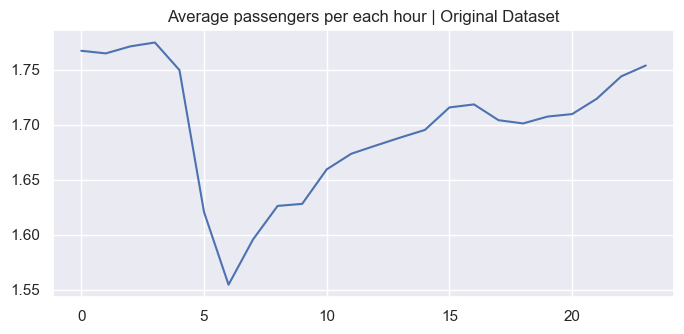

In [44]:
sns.lineplot(x=apph.keys(),
             y=apph.values()).set_title("Average passengers per each hour | Original Dataset")


#### 11. Create a new CSV file which has only one out of every thousand rows.

In [21]:
import csv
import numpy as np

# get random numbers from each 1000 numbers
rand_idx=[]
n=0
x=0
y=1000
while(n<total_rows):
    rand_idx.append(np.random.randint(x,y))
    x=y+1
    y+=1000
    n+=1000
print("Sample Indexes for every 1000 rows")
rand_idx[0:10]

Sample Indexes for every 1000 rows


[598, 1499, 2731, 3179, 4146, 5006, 6007, 7168, 8008, 9734]

In [ ]:
n=0

f=open("trip_data_1.csv",'r')
r=csv.reader(f)

f2=open("one_outof_1000.csv",'w')
f2.write('')
f2.close()
f2=open('one_outof_1000.csv','a')
w=csv.writer(f2,delimiter=',',lineterminator='\n')


for row in r:
    if n in rand_idx:
        w.writerow(row)
    n+=1

f.close()
f2.close()

#### 12. Repeat step 9 with the reduced dataset and compare the two charts.

In [23]:
import csv
f=open("one_outof_1000.csv",'r')
r=csv.reader(f)

n=0

pc_max=float('-inf')
pc_min=float('inf')

tt_max=float('-inf')
tt_min=float('inf')

td_max=float('-inf')
td_min=float('inf')

n=0
for row in r:
    
    if n!=0:
        if (float(row[7]) in range(1,20)) and (float(row[8])>0) and (float(row[9])>0):
            pc=float(row[7])
            pc_max=max(pc_max,pc)
            pc_min=min(pc_min,pc)

            tt=float(row[8])
            tt_max=max(tt_max,tt)
            tt_min=min(tt_min,tt)

            td=float(row[9])
            td_max=max(td_max,td)
            td_min=min(td_min,td)
    
    n+=1

print("passenger_count_max | passenger_count_min | triptime_mx | triptime_min | tripdistance_mx | tripdistance_min")
print(pc_max,"                |",pc_min,"                |",tt_max,"     |",tt_min,"         |",td_max,"          |",td_min)

# other numeric columns : passenger_count,trip_time_in_secs,trip_distance


passenger_count_max | passenger_count_min | triptime_mx | triptime_min | tripdistance_mx | tripdistance_min
6.0                 | 1.0                 | 6480.0      | 2.0          | 37.73           | 0.01


In [30]:
# average passengers per each hour
f=open("one_outof_1000.csv",'r')
r=csv.reader(f)

pph={}
n=0

for row in r:
    if n!=0 and (float(row[7]) in range(1,10)):
        pickup_date=dt.datetime.strptime(row[5],"%Y-%m-%d %H:%M:%S")
        hr=pickup_date.hour
        if hr in pph:
            pph[hr]['Passenger_Count']+=float(row[7])
            pph[hr]['trip_count']+=1
        else:
            pph[hr]={}
            pph[hr]['Passenger_Count']=float(row[7])
            pph[hr]['trip_count']=1
    n+=1

        
pph=dict(sorted(pph.items(),key=lambda item:item[0],reverse=True))

apph_reduced={}
for k,v in pph.items():
    apph_reduced[k]=v['Passenger_Count']/v['trip_count']


    
fig = px.line(x=apph_reduced.keys(),
             y=apph_reduced.values(),
                   title="Average passengers per each hour | Reduced Dataset",
             )
fig.update_layout(
   xaxis = dict(
      tickmode = 'linear'
   ),
    xaxis_title="Hour",
    yaxis_title="Passenger_count"
)
fig.show()

Text(0.5, 1.0, 'Average passengers per each hour | Reduced Dataset')

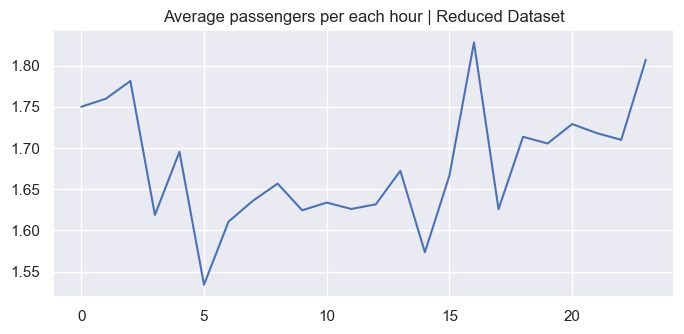

In [45]:
sns.lineplot(x=apph_reduced.keys(),
             y=apph_reduced.values()).set_title("Average passengers per each hour | Reduced Dataset")

In [ ]:
fig = px.line(x=apph.keys(),
             y=apph.values(),
                   title="Average passengers per each hour | Original Dataset",
              
             )
fig.update_layout(
   xaxis = dict(
      tickmode = 'linear'
   ),
    xaxis_title="Hour",
    yaxis_title="Passenger_count"
)
fig.show()

fig = px.line(x=apph_reduced.keys(),
             y=apph_reduced.values(),
                   title="Average passengers per each hour | Reduced Dataset",
             )
fig.update_layout(
   xaxis = dict(
      tickmode = 'linear'
   )
)
fig.show()

Text(0.5, 1.0, 'Average passengers per each hour | Original vs Reduced Dataset')

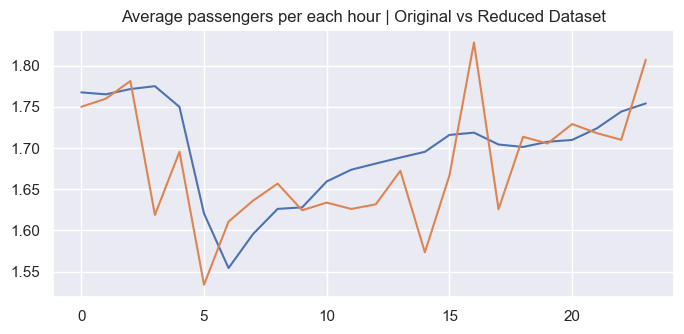

In [48]:
sns.lineplot(x=apph.keys(),
             y=apph.values())

sns.lineplot(x=apph_reduced.keys(),
             y=apph_reduced.values()).set_title("Average passengers per each hour | Original vs Reduced Dataset")

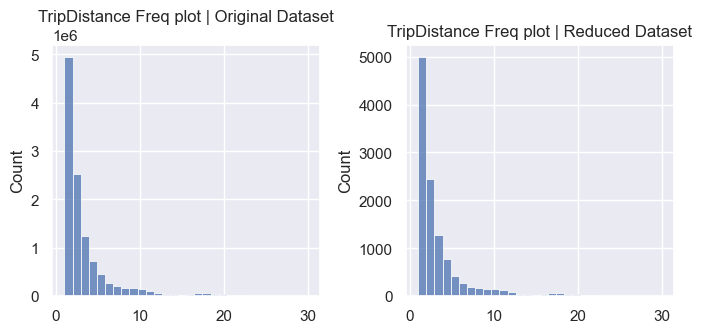

In [29]:
f=open("one_outof_1000.csv",'r')
r=csv.reader(f)
td_reduced=[]
n=0
for row in r:
    if n!=0:
        td_reduced.append(float(row[9]))
    n+=1

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)

sns.histplot(td,kde=False,bins=30,binrange=(1,30),ax=axes[0]).set(title="TripDistance Freq plot | Original Dataset")
sns.histplot(td_reduced,kde=False,bins=30,binrange=(1,30),ax=axes[1]).set(title="TripDistance Freq plot | Reduced Dataset")
plt.show()